## 7.0  Analysis Previous Applications Dataset

> In this notebook I analyze the `previous_application` dataset which is described below:

> - Contains data on clients that have had previous loans with Home Credit.

#### Analysis Summary:

> After analyzing the dataset I created an aggregate table of four functions ('minimum', 'maximum', 'mean','standard deviation') `SK_ID_CURR` for the `AMT_ANNUITY`,`AMT_APPLICATION` and`AMT_CREDIT` fields.  Each field would have a new column for each of the functions.  This created a total of 12 features.  By taking this approach I figure there will be many fields available during model selection that can be removed if there feature importance is zero.

> I also created new columns from some of the category fields by pivoting the count of each unique item within the field.

In [1]:
#import helper ultility module
%load_ext autoreload
%aimport utils
%autoreload 1

In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)

import numpy as np

%matplotlib inline

### 7.1 Import Datasets And Prepare ABT
> - Import the train and test datasets combined using a utility helper 
> - Create Activity Base Table (ABT) to group the fields by type.

In [3]:
dataset = utils.get_previous_application()

In [4]:
#check if every id is unique in dataset
dataset['SK_ID_CURR'].nunique() == len(dataset)

False

In [5]:
dataset.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,"1,730.43","17,145.00","17,145.00",0.00,"17,145.00",SATURDAY,15,...,Connectivity,12.00,middle,POS mobile with interest,"365,243.00",-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,"25,188.62","607,500.00","679,671.00",nan,"607,500.00",THURSDAY,11,...,XNA,36.00,low_action,Cash X-Sell: low,"365,243.00",-134.00,916.00,"365,243.00","365,243.00",1.00
2,2523466,122040,Cash loans,"15,060.74","112,500.00","136,444.50",nan,"112,500.00",TUESDAY,11,...,XNA,12.00,high,Cash X-Sell: high,"365,243.00",-271.00,59.00,"365,243.00","365,243.00",1.00
3,2819243,176158,Cash loans,"47,041.33","450,000.00","470,790.00",nan,"450,000.00",MONDAY,7,...,XNA,12.00,middle,Cash X-Sell: middle,"365,243.00",-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,"31,924.40","337,500.00","404,055.00",nan,"337,500.00",THURSDAY,9,...,XNA,24.00,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [6]:
abt = utils.ABT(dataset)

In [7]:
float_table = abt.float_table
print("Total float64 types: {}".format(len(float_table)))
float_table 

Total float64 types: 15


,num,count,na_count,na_%,mean,std,min,25%,50%,75%,max
AMT_ANNUITY,1,"1,297,979.00","372,235.00",0.22,"15,955.12","14,782.14",0.00,"6,321.78","11,250.00","20,658.42","418,058.15"
AMT_APPLICATION,2,"1,670,214.00",0.00,0.00,"175,233.86","292,779.76",0.00,"18,720.00","71,046.00","180,360.00","6,905,160.00"
AMT_CREDIT,3,"1,670,213.00",1.00,0.00,"196,114.02","318,574.62",0.00,"24,160.50","80,541.00","216,418.50","6,905,160.00"
AMT_DOWN_PAYMENT,4,"774,370.00","895,844.00",0.54,"6,697.40","20,921.50",-0.90,0.00,"1,638.00","7,740.00","3,060,045.00"
AMT_GOODS_PRICE,5,"1,284,699.00","385,515.00",0.23,"227,847.28","315,396.56",0.00,"50,841.00","112,320.00","234,000.00","6,905,160.00"
RATE_DOWN_PAYMENT,6,"774,370.00","895,844.00",0.54,0.08,0.11,-0.00,0.00,0.05,0.11,1.00
RATE_INTEREST_PRIMARY,7,"5,951.00","1,664,263.00",1.00,0.19,0.09,0.03,0.16,0.19,0.19,1.00
RATE_INTEREST_PRIVILEGED,8,"5,951.00","1,664,263.00",1.00,0.77,0.10,0.37,0.72,0.84,0.85,1.00
CNT_PAYMENT,9,"1,297,984.00","372,230.00",0.22,16.05,14.57,0.00,6.00,12.00,24.00,84.00
DAYS_FIRST_DRAWING,10,"997,149.00","673,065.00",0.40,"342,209.86","88,916.12","-2,922.00","365,243.00","365,243.00","365,243.00","365,243.00"


In [8]:
# print description of each field in the integer ABT
field_table = utils.FieldsNames()
field_table.print('previous_application.csv',float_table.index.values.tolist()) 

1) ['AMT_ANNUITY']: Annuity of previous application
----------------------------------------
2) ['AMT_APPLICATION']: For how much credit did client ask on the previous application
----------------------------------------
3) ['AMT_CREDIT']: Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT
----------------------------------------
4) ['AMT_DOWN_PAYMENT']: Down payment on the previous application
----------------------------------------
5) ['AMT_GOODS_PRICE']: Goods price of good that client asked for (if applicable) on the previous application
----------------------------------------
6) ['RATE_DOWN_PAYMENT']: Down payment rate normalized on previous credit
----------------------------------------
7) ['RATE_INTEREST_PRIMARY']: Interest rate normalized on previous credit
------------

In [9]:
int_table = abt.int_table
print("Total int64 types: {}".format(len(int_table)))
int_table 

Total int64 types: 4


,num,count,na_count,na_%,unique,top,top_count,top_%
column,,,,,,,,
HOUR_APPR_PROCESS_START,1,1670214,0,0.00,24,11,192728,0.12
NFLAG_LAST_APPL_IN_DAY,2,1670214,0,0.00,2,1,1664314,1.00
DAYS_DECISION,3,1670214,0,0.00,2922,-245,2444,0.00
SELLERPLACE_AREA,4,1670214,0,0.00,2097,-1,762675,0.46


In [10]:
#  print description of each field in the string ABT
field_table = utils.FieldsNames()
field_table.print('previous_application.csv',int_table.index.values.tolist()) 

1) ['HOUR_APPR_PROCESS_START']: Approximately at what day hour did the client apply for the previous application
----------------------------------------
2) ['NFLAG_LAST_APPL_IN_DAY']: Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice
----------------------------------------
3) ['DAYS_DECISION']: Relative to current application when was the decision about previous application made
----------------------------------------
4) ['SELLERPLACE_AREA']: Selling area of seller place of the previous application
----------------------------------------


In [11]:
other_table = abt.other_table
print("Total string types: {}".format(len(other_table)))
other_table 

Total string types: 16


,num,count,na_count,na_%,unique,top,top_count,top_%
column,,,,,,,,
NAME_CONTRACT_TYPE,1,1670214,0,0.00,4,Cash loans,747553,0.45
WEEKDAY_APPR_PROCESS_START,2,1670214,0,0.00,7,TUESDAY,255118,0.15
FLAG_LAST_APPL_PER_CONTRACT,3,1670214,0,0.00,2,Y,1661739,0.99
NAME_CASH_LOAN_PURPOSE,4,1670214,0,0.00,25,XAP,922661,0.55
NAME_CONTRACT_STATUS,5,1670214,0,0.00,4,Approved,1036781,0.62
NAME_PAYMENT_TYPE,6,1670214,0,0.00,4,Cash through the bank,1033552,0.62
CODE_REJECT_REASON,7,1670214,0,0.00,9,XAP,1353093,0.81
NAME_TYPE_SUITE,8,849809,820405,0.49,7,Unaccompanied,508970,0.30
NAME_CLIENT_TYPE,9,1670214,0,0.00,4,Repeater,1231261,0.74


In [12]:
#  print description of each field in the string ABT
field_table = utils.FieldsNames()
field_table.print('previous_application.csv',other_table.index.values.tolist()) 

1) ['NAME_CONTRACT_TYPE']: Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application
----------------------------------------
2) ['WEEKDAY_APPR_PROCESS_START']: On which day of the week did the client apply for previous application
----------------------------------------
3) ['FLAG_LAST_APPL_PER_CONTRACT']: Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract
----------------------------------------
4) ['NAME_CASH_LOAN_PURPOSE']: Purpose of the cash loan
----------------------------------------
5) ['NAME_CONTRACT_STATUS']: Contract status (approved, cancelled, ...) of previous application
----------------------------------------
6) ['NAME_PAYMENT_TYPE']: Payment method that client chose to pay for the previous application
----------------------------------------
7) ['CODE_REJECT_REASON']: Why was the previous application rejected
---------------------

### 7.2 Plot Certain String Type Fields
> - Here we plot certain fields to visualize their distriutions.

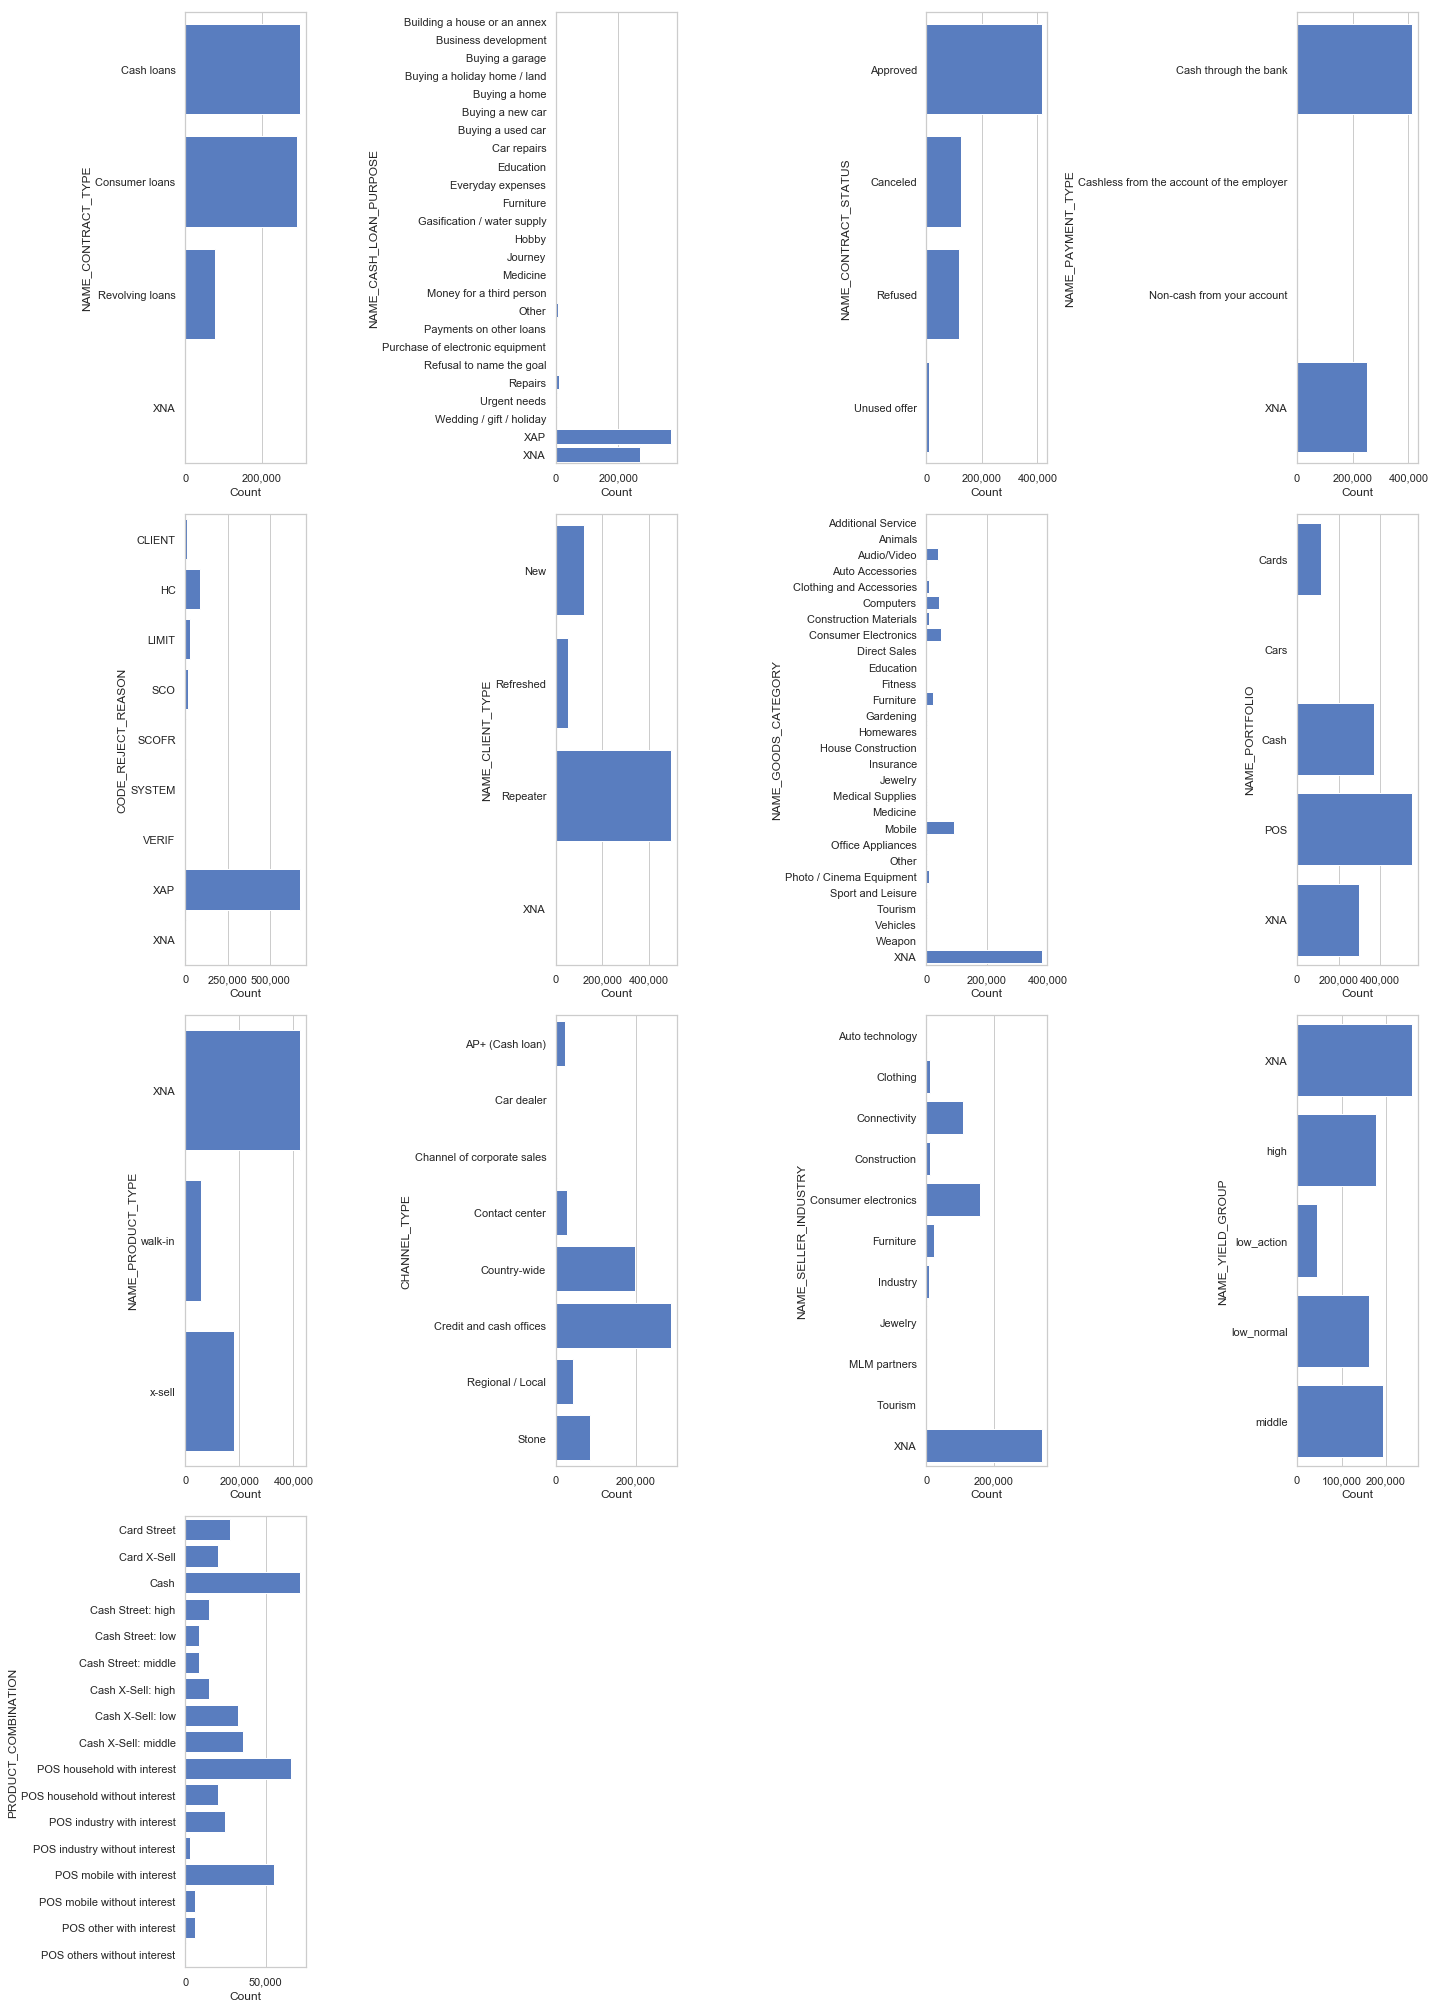

In [13]:
#exclude the 'NAME_TYPE_SUITE'
features = ['NAME_CONTRACT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

utils.plot_hbar(features,dataset)

In [14]:
dataset.groupby(['NAME_CONTRACT_STATUS','CODE_REJECT_REASON'] ).size()

NAME_CONTRACT_STATUS  CODE_REJECT_REASON
Approved              XAP                   1036773
                      XNA                         8
Canceled              XAP                    316319
Refused               HC                     175231
                      LIMIT                   55680
                      SCO                     37467
                      SCOFR                   12811
                      SYSTEM                    717
                      VERIF                    3535
                      XAP                         1
                      XNA                      5236
Unused offer          CLIENT                  26436
dtype: int64

### 7.3 Create Aggregation Fields

In [15]:
agg_features = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT']

#let get minimum, maximum, average and standard deviation
fun_agg = ['min', 'max', 'mean','std']

agg_fun_df = dataset.groupby('SK_ID_CURR')[agg_features].agg(fun_agg)

#rename columns
agg_fun_df.columns = ["{}_{}".format(c[0],c[1].upper()) for c in agg_fun_df.columns.values.tolist()] 

#let fill nan values
agg_fun_df.fillna(0,inplace=True)
agg_fun_df.reset_index(inplace=True)

In [16]:
agg_fun_df.head()

,SK_ID_CURR,AMT_ANNUITY_MIN,AMT_ANNUITY_MAX,AMT_ANNUITY_MEAN,AMT_ANNUITY_STD,AMT_APPLICATION_MIN,AMT_APPLICATION_MAX,AMT_APPLICATION_MEAN,AMT_APPLICATION_STD,AMT_CREDIT_MIN,AMT_CREDIT_MAX,AMT_CREDIT_MEAN,AMT_CREDIT_STD
0,100001,"3,951.00","3,951.00","3,951.00",0.00,"24,835.50","24,835.50","24,835.50",0.00,"23,787.00","23,787.00","23,787.00",0.00
1,100002,"9,251.77","9,251.77","9,251.77",0.00,"179,055.00","179,055.00","179,055.00",0.00,"179,055.00","179,055.00","179,055.00",0.00
2,100003,"6,737.31","98,356.99","56,553.99","46,332.56","68,809.50","900,000.00","435,436.50","424,161.62","68,053.50","1,035,882.00","484,191.00","497,949.86"
3,100004,"5,357.25","5,357.25","5,357.25",0.00,"24,282.00","24,282.00","24,282.00",0.00,"20,106.00","20,106.00","20,106.00",0.00
4,100005,"4,813.20","4,813.20","4,813.20",0.00,0.00,"44,617.50","22,308.75","31,549.34",0.00,"40,153.50","20,076.75","28,392.81"


### 7.4 Create New Category Count Colums
> - Pivot cetain column by each unique category within the column and count the categories by id

In [17]:
def create_table(feature):
    table = pd.pivot_table(dataset,index =['SK_ID_CURR'], 
                     columns=[feature],
                     values=['SK_ID_PREV'],aggfunc='count',fill_value=0)
    
    #lets rename columns and get rid of multi index
    cols = ["PRE_APP_{}_".format(feature) + c.upper() for c in table.columns.levels[1]]
    
    remove = []
    remove.append(('+',''))
    remove.append(('(',''))
    remove.append((')',''))
    remove.append((' ','_'))
    remove.append(('/',''))
    remove.append(('-',''))
    remove.append(('__','_'))
    for idx,col in enumerate(cols):
        for char in remove:
            cols[idx] = cols[idx].replace(char[0],char[1])
        
    
    table.columns = cols

    table.reset_index(inplace=True)

    utils.applyMax(cols,table)

    #increase category by 1 to make base category 1
    cols = [c for c in table.columns if c !='SK_ID_CURR']
    for c in cols:
        table[c] = table[c].apply(lambda x: x+1)
    
    return table

In [18]:
#create new dataframe
cat_features = ['NAME_CONTRACT_TYPE',
                'NAME_CONTRACT_STATUS',
                'NAME_CLIENT_TYPE',
                'NAME_PORTFOLIO',
                'NAME_PRODUCT_TYPE',
                'CHANNEL_TYPE',
                'NAME_SELLER_INDUSTRY',
                'NAME_YIELD_GROUP',
                'PRODUCT_COMBINATION']
table_df = create_table(cat_features[0])
for f in cat_features[1:]:
    table = create_table(f)
    table_df = table_df.merge(table,
                                  how='left', 
                                  on='SK_ID_CURR',
                                  validate='one_to_one')

In [19]:
table_df.dtypes

SK_ID_CURR                                                    int64
PRE_APP_NAME_CONTRACT_TYPE_CASH_LOANS                         int64
PRE_APP_NAME_CONTRACT_TYPE_CONSUMER_LOANS                     int64
PRE_APP_NAME_CONTRACT_TYPE_REVOLVING_LOANS                    int64
PRE_APP_NAME_CONTRACT_TYPE_XNA                                int64
PRE_APP_NAME_CONTRACT_STATUS_APPROVED                         int64
PRE_APP_NAME_CONTRACT_STATUS_CANCELED                         int64
PRE_APP_NAME_CONTRACT_STATUS_REFUSED                          int64
PRE_APP_NAME_CONTRACT_STATUS_UNUSED_OFFER                     int64
PRE_APP_NAME_CLIENT_TYPE_NEW                                  int64
PRE_APP_NAME_CLIENT_TYPE_REFRESHED                            int64
PRE_APP_NAME_CLIENT_TYPE_REPEATER                             int64
PRE_APP_NAME_CLIENT_TYPE_XNA                                  int64
PRE_APP_NAME_PORTFOLIO_CARDS                                  int64
PRE_APP_NAME_PORTFOLIO_CARS                     

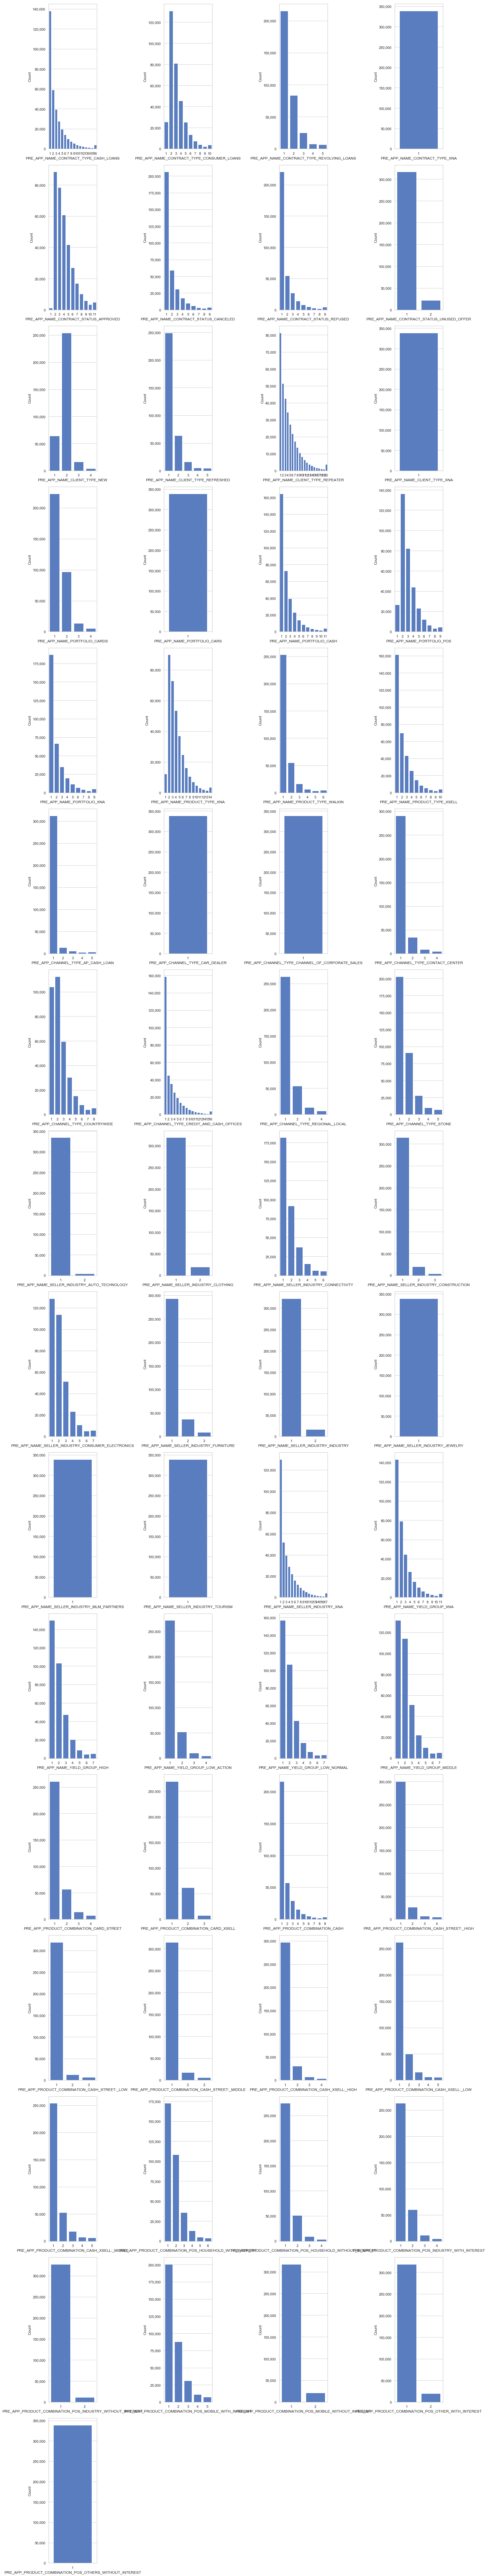

In [20]:
utils.plot_bar(table_df.columns[1:],table_df)

In [21]:
#lets exclude columns that only have one category
include_features = []
for col in table_df.columns:
    if len(table_df[col].unique()) > 1:
        include_features.append(col)
        
include_features

['SK_ID_CURR',
 'PRE_APP_NAME_CONTRACT_TYPE_CASH_LOANS',
 'PRE_APP_NAME_CONTRACT_TYPE_CONSUMER_LOANS',
 'PRE_APP_NAME_CONTRACT_TYPE_REVOLVING_LOANS',
 'PRE_APP_NAME_CONTRACT_STATUS_APPROVED',
 'PRE_APP_NAME_CONTRACT_STATUS_CANCELED',
 'PRE_APP_NAME_CONTRACT_STATUS_REFUSED',
 'PRE_APP_NAME_CONTRACT_STATUS_UNUSED_OFFER',
 'PRE_APP_NAME_CLIENT_TYPE_NEW',
 'PRE_APP_NAME_CLIENT_TYPE_REFRESHED',
 'PRE_APP_NAME_CLIENT_TYPE_REPEATER',
 'PRE_APP_NAME_PORTFOLIO_CARDS',
 'PRE_APP_NAME_PORTFOLIO_CASH',
 'PRE_APP_NAME_PORTFOLIO_POS',
 'PRE_APP_NAME_PORTFOLIO_XNA',
 'PRE_APP_NAME_PRODUCT_TYPE_XNA',
 'PRE_APP_NAME_PRODUCT_TYPE_WALKIN',
 'PRE_APP_NAME_PRODUCT_TYPE_XSELL',
 'PRE_APP_CHANNEL_TYPE_AP_CASH_LOAN',
 'PRE_APP_CHANNEL_TYPE_CONTACT_CENTER',
 'PRE_APP_CHANNEL_TYPE_COUNTRYWIDE',
 'PRE_APP_CHANNEL_TYPE_CREDIT_AND_CASH_OFFICES',
 'PRE_APP_CHANNEL_TYPE_REGIONAL_LOCAL',
 'PRE_APP_CHANNEL_TYPE_STONE',
 'PRE_APP_NAME_SELLER_INDUSTRY_AUTO_TECHNOLOGY',
 'PRE_APP_NAME_SELLER_INDUSTRY_CLOTHING',
 'PRE_APP

### 7.5 Combine Dataset
> Combined the aggregate features dataframe and category dataframe

In [22]:
final_df = agg_fun_df.merge(table_df[include_features],
                    how='left', 
                    on='SK_ID_CURR',
                    validate='one_to_one')

In [23]:
final_df.head()

,SK_ID_CURR,AMT_ANNUITY_MIN,AMT_ANNUITY_MAX,AMT_ANNUITY_MEAN,AMT_ANNUITY_STD,AMT_APPLICATION_MIN,AMT_APPLICATION_MAX,AMT_APPLICATION_MEAN,AMT_APPLICATION_STD,AMT_CREDIT_MIN,...,PRE_APP_PRODUCT_COMBINATION_CASH_XSELL:_HIGH,PRE_APP_PRODUCT_COMBINATION_CASH_XSELL:_LOW,PRE_APP_PRODUCT_COMBINATION_CASH_XSELL:_MIDDLE,PRE_APP_PRODUCT_COMBINATION_POS_HOUSEHOLD_WITH_INTEREST,PRE_APP_PRODUCT_COMBINATION_POS_HOUSEHOLD_WITHOUT_INTEREST,PRE_APP_PRODUCT_COMBINATION_POS_INDUSTRY_WITH_INTEREST,PRE_APP_PRODUCT_COMBINATION_POS_INDUSTRY_WITHOUT_INTEREST,PRE_APP_PRODUCT_COMBINATION_POS_MOBILE_WITH_INTEREST,PRE_APP_PRODUCT_COMBINATION_POS_MOBILE_WITHOUT_INTEREST,PRE_APP_PRODUCT_COMBINATION_POS_OTHER_WITH_INTEREST
0,100001,"3,951.00","3,951.00","3,951.00",0.00,"24,835.50","24,835.50","24,835.50",0.00,"23,787.00",...,1,1,1,1,1,1,1,2,1,1
1,100002,"9,251.77","9,251.77","9,251.77",0.00,"179,055.00","179,055.00","179,055.00",0.00,"179,055.00",...,1,1,1,1,1,1,1,1,1,2
2,100003,"6,737.31","98,356.99","56,553.99","46,332.56","68,809.50","900,000.00","435,436.50","424,161.62","68,053.50",...,1,2,1,2,1,2,1,1,1,1
3,100004,"5,357.25","5,357.25","5,357.25",0.00,"24,282.00","24,282.00","24,282.00",0.00,"20,106.00",...,1,1,1,1,1,1,1,1,2,1
4,100005,"4,813.20","4,813.20","4,813.20",0.00,0.00,"44,617.50","22,308.75","31,549.34",0.00,...,1,1,1,1,1,1,1,2,1,1


### 7.6 Save Final Dataset To File

In [24]:
final_df.to_csv('data_pre_processed/1_7_previous_applications.csv',index=False)